In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from data_preprocessing import get_X_y
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score



In [4]:
X, y = get_X_y()
X.head()


,year,length_ft,beam_ft,numEngines,totalHP,zip,created_month,created_year,type_power,type_sail,...,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV
0,-2.303014,-0.269821,-0.046988,-0.384248,-0.306995,-0.551299,1.187661,0.669243,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0.357137,1.748019,0.650918,1.745032,1.543106,0.017047,0.885586,0.669243,True,False,...,False,False,False,False,False,False,False,False,False,False
2,0.561764,-0.588427,-0.348483,-0.384248,-0.520468,-0.076744,1.489735,0.669243,True,False,...,False,False,False,False,False,False,False,False,False,False
3,0.050196,0.898402,0.463879,1.745032,0.973844,-0.749710,0.885586,0.669243,True,False,...,True,False,False,False,False,False,False,False,False,False
4,-2.098387,2.172827,1.767568,1.745032,1.258475,-1.086708,0.583511,-0.442682,True,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.8, random_state=0)


In [6]:
n_comp = 18
print('number of components', n_comp)
cols = ['PC-'+str(i+1) for i in range(n_comp)]
cols

number of components 18


['PC-1',
 'PC-2',
 'PC-3',
 'PC-4',
 'PC-5',
 'PC-6',
 'PC-7',
 'PC-8',
 'PC-9',
 'PC-10',
 'PC-11',
 'PC-12',
 'PC-13',
 'PC-14',
 'PC-15',
 'PC-16',
 'PC-17',
 'PC-18']

PC-1     0.25
PC-2     0.10
PC-3     0.08
PC-4     0.06
PC-5     0.05
PC-6     0.04
PC-7     0.04
PC-8     0.03
PC-9     0.02
PC-10    0.02
PC-11    0.01
PC-12    0.01
PC-13    0.01
PC-14    0.01
PC-15    0.01
PC-16    0.01
PC-17    0.01
PC-18    0.01
dtype: float64


<Axes: title={'center': 'PVE'}>

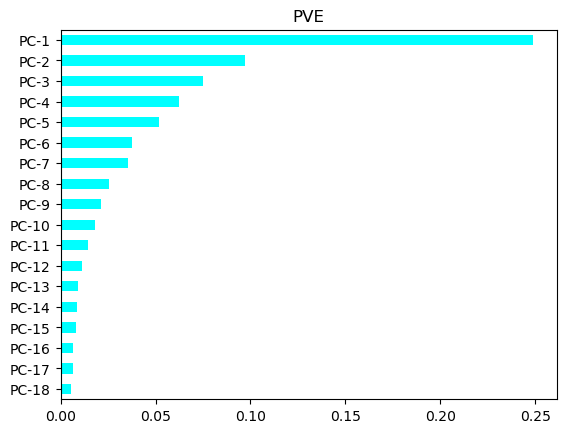

In [7]:
pca = PCA(n_components=n_comp)
pca.fit(X_train)
PVE = pca.explained_variance_ratio_
PVE = pd.Series(PVE,index=cols)
print(PVE.round(2))
PVE.sort_values().plot.barh(color='cyan',title='PVE')

In [8]:
Z_train = pca.transform(X_train)
Z_test = pca.transform(X_test)
Z_train = pd.DataFrame(Z_train, columns=cols)
Z_test = pd.DataFrame(Z_test, columns=cols)
lr = LinearRegression()
lr.fit(Z_train,y_train)
(Z_train.shape)

(4601, 18)


         best B = {'n_estimators': 1024}
  validation R2 = 0.821
test R2 0.902


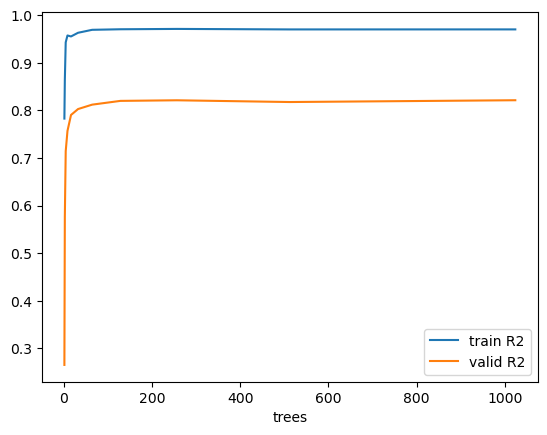

In [9]:
# Fourth cross-validate to determine optimal depth
B = ( 1, 2, 4, 8, 16, 32, 64,128,256,512,1024)
grid = {'n_estimators':B}

rf = RandomForestRegressor(max_features = 1/3)    # 1/3 for regressor
rfCV = GridSearchCV(rf,param_grid=grid,return_train_score=True,n_jobs=-1)
rfCV.fit(Z_train,y_train)

print()
print('         best B =',rfCV.best_params_)
print('  validation R2 =',rfCV.best_score_.round(3))

results = pd.DataFrame()
results['trees'] = grid['n_estimators']
results['train R2'] = rfCV.cv_results_['mean_train_score']
results['valid R2']  = rfCV.cv_results_['mean_test_score']
results.plot.line(x='trees',y=['train R2','valid R2'])
# test R2
print('test R2',rfCV.score(Z_test,y_test).round(3))


         best B = {'n_estimators': 1024}
  validation R2 = 0.82
test R2 0.905


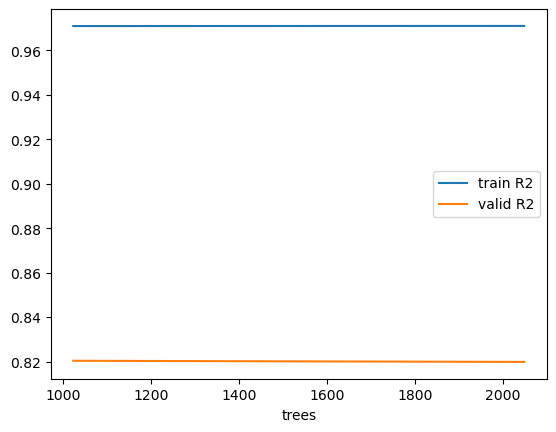

In [10]:
# Fourth cross-validate to determine optimal depth
B = ( 1024,2048)
grid = {'n_estimators':B}

rf = RandomForestRegressor(max_features = 1/3)    # 1/3 for regressor
rfCV = GridSearchCV(rf,param_grid=grid,return_train_score=True,n_jobs=-1)
rfCV.fit(Z_train,y_train)

print()
print('         best B =',rfCV.best_params_)
print('  validation R2 =',rfCV.best_score_.round(3))

results = pd.DataFrame()
results['trees'] = grid['n_estimators']
results['train R2'] = rfCV.cv_results_['mean_train_score']
results['valid R2']  = rfCV.cv_results_['mean_test_score']
results.plot.line(x='trees',y=['train R2','valid R2'])
# test R2
print('test R2',rfCV.score(Z_test,y_test).round(3))


         best B = {'n_estimators': 1025}
  validation R2 = 0.821
test R2 0.906


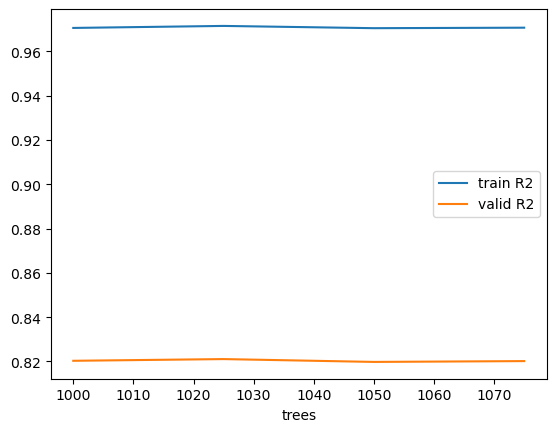

In [11]:
# Fourth cross-validate to determine optimal depth
B = np.arange(1000,1100,25)
grid = {'n_estimators':B}

rf = RandomForestRegressor(max_features = 1/3)    # 1/3 for regressor
rfCV = GridSearchCV(rf,param_grid=grid,return_train_score=True,n_jobs=-1)
rfCV.fit(Z_train,y_train)

print()
print('         best B =',rfCV.best_params_)
print('  validation R2 =',rfCV.best_score_.round(3))

results = pd.DataFrame()
results['trees'] = grid['n_estimators']
results['train R2'] = rfCV.cv_results_['mean_train_score']
results['valid R2']  = rfCV.cv_results_['mean_test_score']
results.plot.line(x='trees',y=['train R2','valid R2'])
# test R2
print('test R2',rfCV.score(Z_test,y_test).round(3))


         best B = {'n_estimators': 121}
  validation R2 = 0.825
test R2 0.914


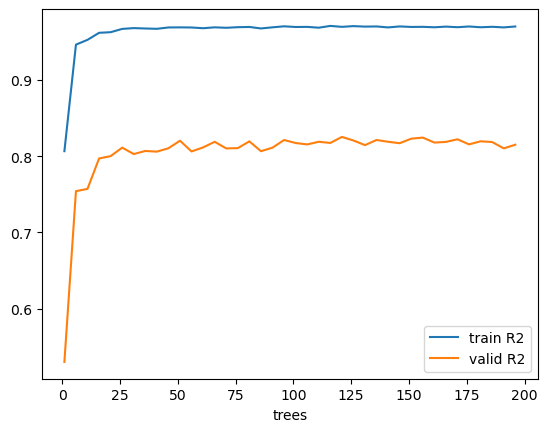

In [15]:
# Fourth cross-validate to determine optimal depth
B = np.arange(1,200,5)
grid = {'n_estimators':B}

rf = RandomForestRegressor(max_features = 1/3)    # 1/3 for regressor
rfCV = GridSearchCV(rf,param_grid=grid,return_train_score=True,n_jobs=-1)
rfCV.fit(Z_train,y_train)

print()
print('         best B =',rfCV.best_params_)
print('  validation R2 =',rfCV.best_score_.round(3))

results = pd.DataFrame()
results['trees'] = grid['n_estimators']
results['train R2'] = rfCV.cv_results_['mean_train_score']
results['valid R2']  = rfCV.cv_results_['mean_test_score']
results.plot.line(x='trees',y=['train R2','valid R2'])
# test R2
print('test R2',rfCV.score(Z_test,y_test).round(3))


         best B = {'n_estimators': 104}
  validation R2 = 0.83
test R2 0.904


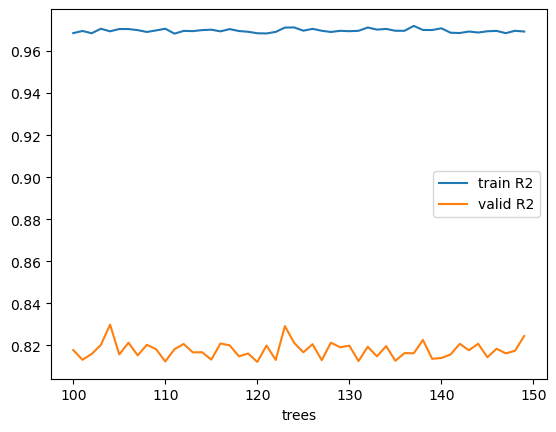

In [16]:
# Fourth cross-validate to determine optimal depth
B = np.arange(100,150,1)
grid = {'n_estimators':B}

rf = RandomForestRegressor(max_features = 1/3)    # 1/3 for regressor
rfCV = GridSearchCV(rf,param_grid=grid,return_train_score=True,n_jobs=-1)
rfCV.fit(Z_train,y_train)

print()
print('         best B =',rfCV.best_params_)
print('  validation R2 =',rfCV.best_score_.round(3))

results = pd.DataFrame()
results['trees'] = grid['n_estimators']
results['train R2'] = rfCV.cv_results_['mean_train_score']
results['valid R2']  = rfCV.cv_results_['mean_test_score']
results.plot.line(x='trees',y=['train R2','valid R2'])
# test R2
print('test R2',rfCV.score(Z_test,y_test).round(3))


         best B = {'n_estimators': 113}
  validation R2 = 0.824
test R2 0.902


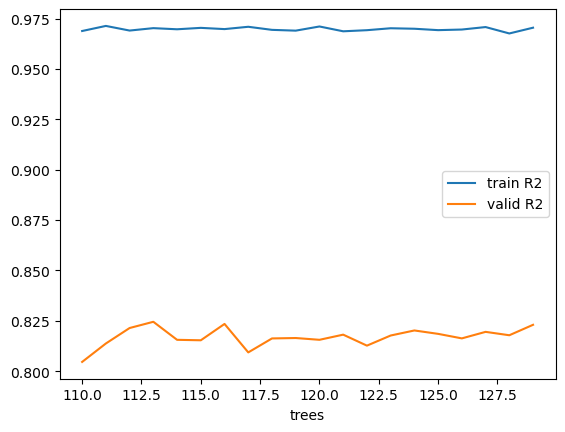

In [17]:
# Fourth cross-validate to determine optimal depth
B = np.arange(110,130,1)
grid = {'n_estimators':B}

rf = RandomForestRegressor(max_features = 1/3)    # 1/3 for regressor
rfCV = GridSearchCV(rf,param_grid=grid,return_train_score=True,n_jobs=-1)
rfCV.fit(Z_train,y_train)

print()
print('         best B =',rfCV.best_params_)
print('  validation R2 =',rfCV.best_score_.round(3))

results = pd.DataFrame()
results['trees'] = grid['n_estimators']
results['train R2'] = rfCV.cv_results_['mean_train_score']
results['valid R2']  = rfCV.cv_results_['mean_test_score']
results.plot.line(x='trees',y=['train R2','valid R2'])
# test R2
print('test R2',rfCV.score(Z_test,y_test).round(3))


         best B = {'n_estimators': 121}
  validation R2 = 0.821
test R2 0.903


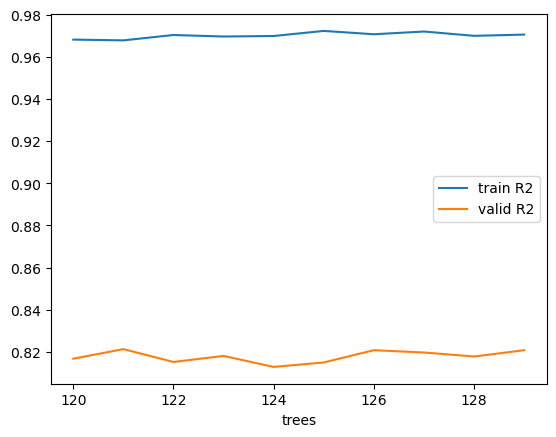

In [18]:
# Fourth cross-validate to determine optimal depth
B = np.arange(120,130,1)
grid = {'n_estimators':B}

rf = RandomForestRegressor(max_features = 1/3)    # 1/3 for regressor
rfCV = GridSearchCV(rf,param_grid=grid,return_train_score=True,n_jobs=-1)
rfCV.fit(Z_train,y_train)

print()
print('         best B =',rfCV.best_params_)
print('  validation R2 =',rfCV.best_score_.round(3))

results = pd.DataFrame()
results['trees'] = grid['n_estimators']
results['train R2'] = rfCV.cv_results_['mean_train_score']
results['valid R2']  = rfCV.cv_results_['mean_test_score']
results.plot.line(x='trees',y=['train R2','valid R2'])
# test R2
print('test R2',rfCV.score(Z_test,y_test).round(3))


         best B = {'n_estimators': 114}
  validation R2 = 0.826
test R2 0.907


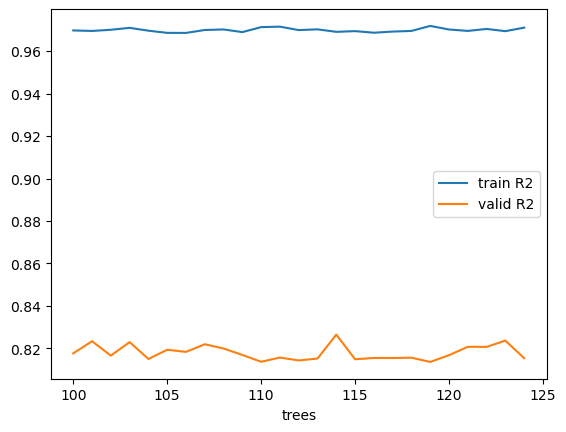

In [19]:
# Fourth cross-validate to determine optimal depth
B = np.arange(100,125,1)
grid = {'n_estimators':B}

rf = RandomForestRegressor(max_features = 1/3)    # 1/3 for regressor
rfCV = GridSearchCV(rf,param_grid=grid,return_train_score=True,n_jobs=-1)
rfCV.fit(Z_train,y_train)

print()
print('         best B =',rfCV.best_params_)
print('  validation R2 =',rfCV.best_score_.round(3))

results = pd.DataFrame()
results['trees'] = grid['n_estimators']
results['train R2'] = rfCV.cv_results_['mean_train_score']
results['valid R2']  = rfCV.cv_results_['mean_test_score']
results.plot.line(x='trees',y=['train R2','valid R2'])
# test R2
print('test R2',rfCV.score(Z_test,y_test).round(3))

In [ ]:
# Fourth cross-validate to determine optimal depth
B = np.arange(1, 300,10)
grid = {'n_estimators':B}

rf = RandomForestRegressor(max_features = 1/3)    # 1/3 for regressor
rfCV = GridSearchCV(rf,param_grid=grid,return_train_score=True,n_jobs=-1)
rfCV.fit(Z_train,y_train)

print()
print('         best B =',rfCV.best_params_)
print('  validation R2 =',rfCV.best_score_.round(3))

results = pd.DataFrame()
results['trees'] = grid['n_estimators']
results['train R2'] = rfCV.cv_results_['mean_train_score']
results['valid R2']  = rfCV.cv_results_['mean_test_score']
results.plot.line(x='trees',y=['train R2','valid R2'])
# test R2
print('test R2',rfCV.score(Z_test,y_test).round(3))


         best B = {'n_estimators': 61}
  validation R2 = 0.695
test R2 0.68


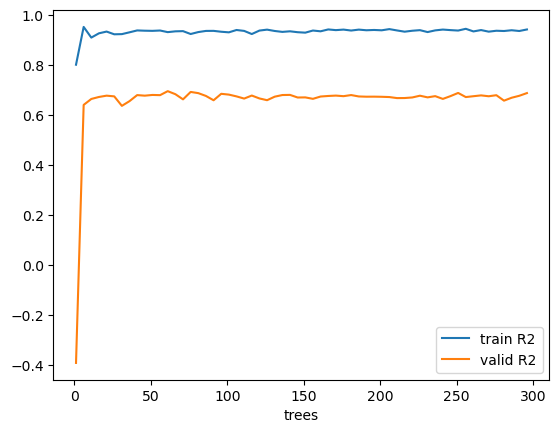

In [9]:
# Fourth cross-validate to determine optimal depth
B = np.arange(1, 300,5)
grid = {'n_estimators':B}

rf = RandomForestRegressor(max_features = 1/3)    # 1/3 for regressor
rfCV = GridSearchCV(rf,param_grid=grid,return_train_score=True,n_jobs=-1)
rfCV.fit(Z_train,y_train)

print()
print('         best B =',rfCV.best_params_)
print('  validation R2 =',rfCV.best_score_.round(3))

results = pd.DataFrame()
results['trees'] = grid['n_estimators']
results['train R2'] = rfCV.cv_results_['mean_train_score']
results['valid R2']  = rfCV.cv_results_['mean_test_score']
results.plot.line(x='trees',y=['train R2','valid R2'])
# test R2
print('test R2',rfCV.score(Z_test,y_test).round(3))

In [10]:
# Fourth cross-validate to determine optimal depth
B = np.arange(200, 300,4)
grid = {'n_estimators':B}

rf = RandomForestRegressor(max_features = 1/3)    # 1/3 for regressor
rfCV = GridSearchCV(rf,param_grid=grid,return_train_score=True,n_jobs=-1)
rfCV.fit(Z_train,y_train)

print()
print('         best B =',rfCV.best_params_)
print('  validation R2 =',rfCV.best_score_.round(3))

results = pd.DataFrame()
results['trees'] = grid['n_estimators']
results['train R2'] = rfCV.cv_results_['mean_train_score']
results['valid R2']  = rfCV.cv_results_['mean_test_score']
results.plot.line(x='trees',y=['train R2','valid R2'])
# test R2
print('test R2',rfCV.score(Z_test,y_test).round(3))

KeyboardInterrupt: 

In [ ]:
# Fourth cross-validate to determine optimal depth
B = np.arange(200, 300,1)
grid = {'n_estimators':B}

rf = RandomForestRegressor(max_features = 1/3)    # 1/3 for regressor
rfCV = GridSearchCV(rf,param_grid=grid,return_train_score=True,n_jobs=-1)
rfCV.fit(Z_train,y_train)

print()
print('         best B =',rfCV.best_params_)
print('  validation R2 =',rfCV.best_score_.round(3))

results = pd.DataFrame()
results['trees'] = grid['n_estimators']
results['train R2'] = rfCV.cv_results_['mean_train_score']
results['valid R2']  = rfCV.cv_results_['mean_test_score']
results.plot.line(x='trees',y=['train R2','valid R2'])
# test R2
print('test R2',rfCV.score(Z_test,y_test).round(3))

In [ ]:
print('test R2',rfCV.best_estimator_.score(Z_test,y_test).round(3))

In [ ]:
# Fourth cross-validate to determine optimal depth
B = np.arange(39, 50,1)
grid = {'n_estimators':B}

rf = RandomForestRegressor(max_features = 1/3)    # 1/3 for regressor
rfCV = GridSearchCV(rf,param_grid=grid,return_train_score=True,n_jobs=-1)
rfCV.fit(Z_train,y_train)

print()
print('         best B =',rfCV.best_params_)
print('  validation R2 =',rfCV.best_score_.round(3))

results = pd.DataFrame()
results['trees'] = grid['n_estimators']
results['train R2'] = rfCV.cv_results_['mean_train_score']
results['valid R2']  = rfCV.cv_results_['mean_test_score']
results.plot.line(x='trees',y=['train R2','valid R2'])
# test R2
print('test R2',rfCV.score(Z_test,y_test).round(3))

In [ ]:
# Fourth cross-validate to determine optimal depth
B = np.arange(1, 100,2)
grid = {'n_estimators':B}

rf = RandomForestRegressor(max_features = 1/3)    # 1/3 for regressor
rfCV = GridSearchCV(rf,param_grid=grid,return_train_score=True,n_jobs=-1)
rfCV.fit(Z_train,y_train)

print()
print('         best B =',rfCV.best_params_)
print('  validation R2 =',rfCV.best_score_.round(3))

results = pd.DataFrame()
results['trees'] = grid['n_estimators']
results['train R2'] = rfCV.cv_results_['mean_train_score']
results['valid R2']  = rfCV.cv_results_['mean_test_score']
results.plot.line(x='trees',y=['train R2','valid R2'])
# test R2
print('test R2',rfCV.score(Z_test,y_test).round(3))

In [ ]:
# Fourth cross-validate to determine optimal depth
B = np.arange(1, 300,2)
grid = {'n_estimators':B}

rf = RandomForestRegressor(max_features = 1/3)    # 1/3 for regressor
rfCV = GridSearchCV(rf,param_grid=grid,return_train_score=True,n_jobs=-1)
rfCV.fit(Z_train,y_train)

print()
print('         best B =',rfCV.best_params_)
print('  validation R2 =',rfCV.best_score_.round(3))

results = pd.DataFrame()
results['trees'] = grid['n_estimators']
results['train R2'] = rfCV.cv_results_['mean_train_score']
results['valid R2']  = rfCV.cv_results_['mean_test_score']
results.plot.line(x='trees',y=['train R2','valid R2'])
# test R2
print('test R2',rfCV.score(Z_test,y_test).round(3))

In [ ]:
# Fourth cross-validate to determine optimal depth
B = np.arange(120, 150,1)
grid = {'n_estimators':B}

rf = RandomForestRegressor(max_features = 1/3)    # 1/3 for regressor
rfCV = GridSearchCV(rf,param_grid=grid,return_train_score=True,n_jobs=-1)
rfCV.fit(Z_train,y_train)

print()
print('         best B =',rfCV.best_params_)
print('  validation R2 =',rfCV.rfCV.best_estimator_.score(Z_train,y_train).round(3))

results = pd.DataFrame()
results['trees'] = grid['n_estimators']
results['train R2'] = rfCV.cv_results_['mean_train_score']
results['valid R2']  = rfCV.cv_results_['mean_test_score']
results.plot.line(x='trees',y=['train R2','valid R2'])
# test R2
print('test R2',rfCV.score(Z_test,y_test).round(3))

In [ ]:
# Fourth cross-validate to determine optimal depth
B = np.arange(1, 50,1)
grid = {'n_estimators':B}

rf = RandomForestRegressor(max_features = 1/3)    # 1/3 for regressor
rfCV = GridSearchCV(rf,param_grid=grid,return_train_score=True,n_jobs=-1)
rfCV.fit(Z_train,y_train)

print()
print('         best B =',rfCV.best_params_)
print('  validation R2 =',rfCV.best_score_.round(3))

results = pd.DataFrame()
results['trees'] = grid['n_estimators']
results['train R2'] = rfCV.cv_results_['mean_train_score']
results['valid R2']  = rfCV.cv_results_['mean_test_score']
results.plot.line(x='trees',y=['train R2','valid R2'])
# test R2
print('test R2',rfCV.score(Z_test,y_test).round(3))